# Parameter analysis and ablation, data are from Rivanna code EfficientCoT

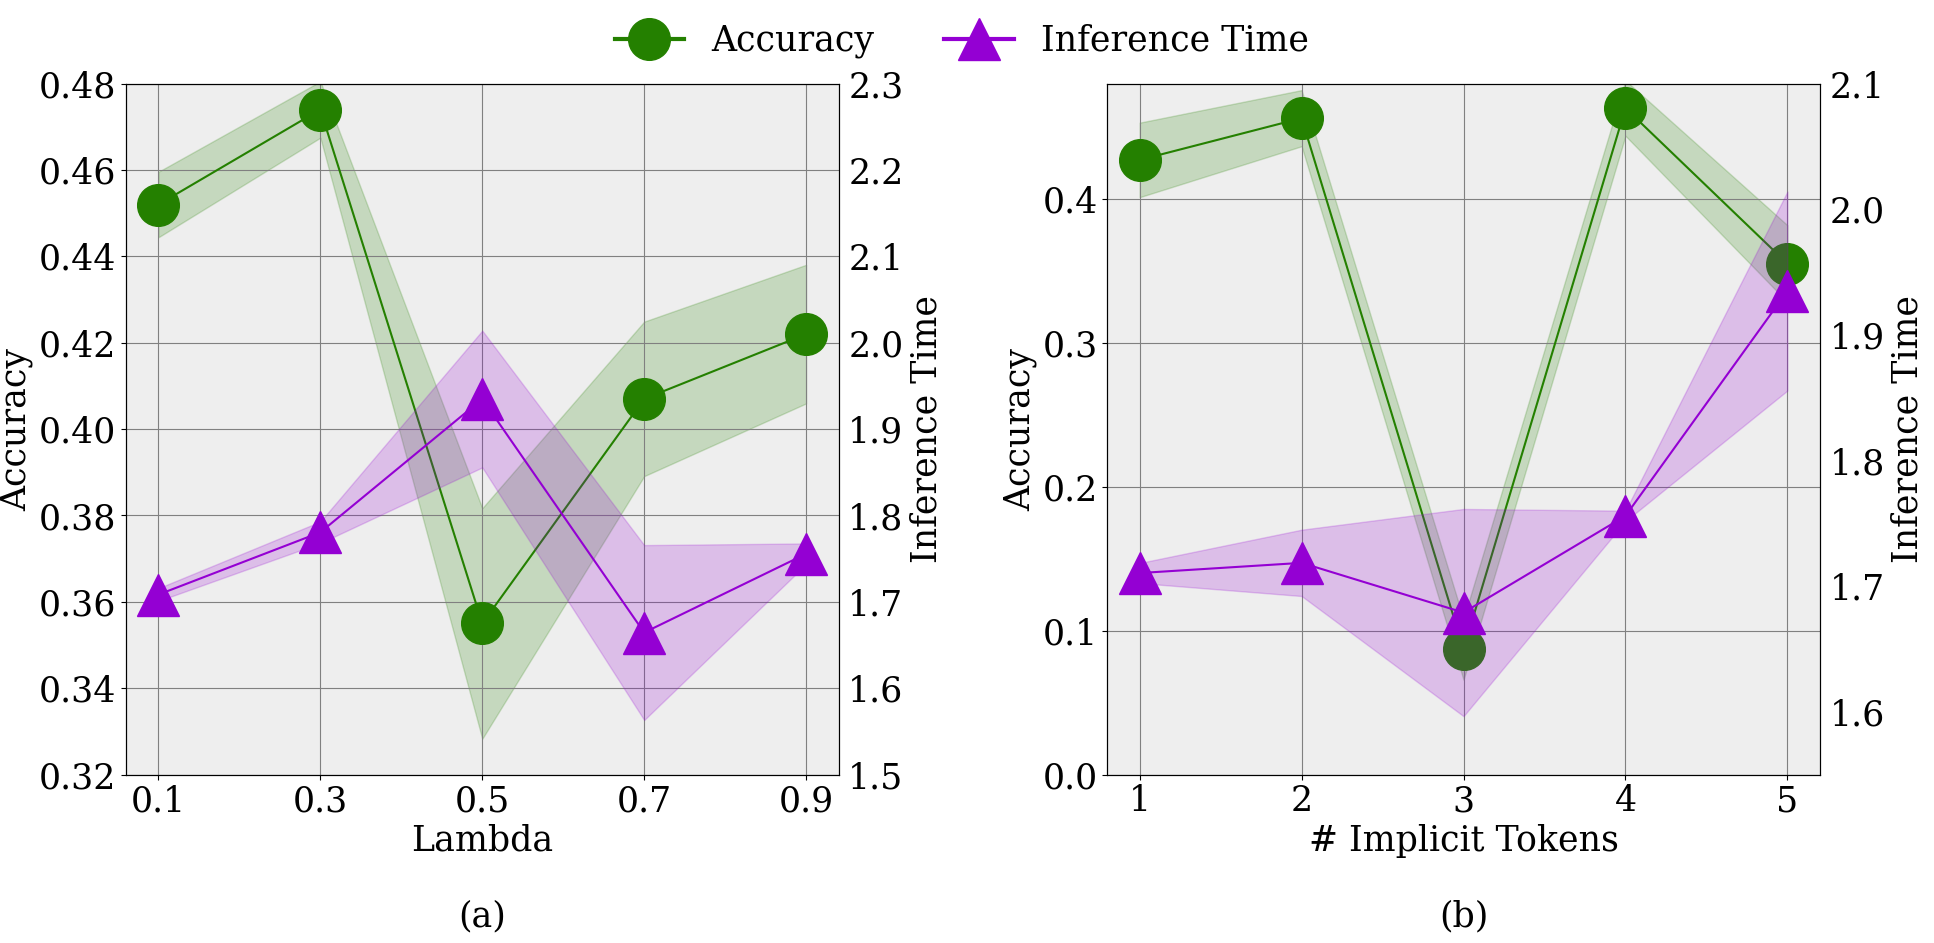

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

plt.rc('font',family='Times New Roman')

# Data
spc_x = [0.1, 0.3, 0.5, 0.7, 0.9] # alpha
spd_x = [1, 2, 3, 4, 5]

spc_time_mean = np.array([1.7084348397254900, 1.7805054817199700, 1.9348597438335400,1.664480010986330 ,1.755616327047350])
spc_time_var  = np.array([0.007404447611842730, 0.01247609995010450,  0.07918634511514940 ,0.10124109481242700,0.012041543784954200])
spc_acc_mean =np.array([0.45200000000000000, 0.4740000000000000, 0.355, 0.40700000000000000, 0.422])
spc_acc_var = np.array([0.007582875444051560, 0.006519202405202650, 0.02669269563007830, 0.017888543819998300, 0.01604680653588120])

spd_time_mean= np.array([1.7104514837265000,1.7185469853878000,1.6789888164997100,1.7558988904953000,1.9348597438335400])
spd_time_var = np.array([0.00800071029512835, 0.026386713302752400,0.08246215923997770, 0.004175159476767660,0.07918634511514940])
spd_acc_mean = np.array([0.42700000000000000,0.45600000000000000,0.087,0.46300000000000000,0.355])
spd_acc_var = np.array([0.025884358211089600, 0.019493588689617900,0.021095023109729000,0.019235384061671300,0.02669269563007830])

# Creating 1x2 subplot with square aspect ratio
plt.rcParams['hatch.linewidth'] = 2.5
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams["font.size"] = 25

# Change the figure size to make each subplot more square (8x8 per subplot)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting for first subplot
ax1.set_xticks(spc_x)
ax1.set_xlabel('Lambda')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(0.32, 0.48)
ax1.set_facecolor('#eeeeee')
ax1.grid(color='grey')
ax1.plot(spc_x, spc_acc_mean, color='#248000', marker='o', linestyle='-', markersize=30, clip_on=False)
ax1.tick_params(axis='y', which='both', labelleft=True, labelright=False)
ax1.fill_between(spc_x, spc_acc_mean - spc_acc_var, spc_acc_mean + spc_acc_var, color='#248000', alpha=0.2)

# Set aspect ratio for first subplot to be more square
ax1.set_box_aspect(1)

ax1_twin = ax1.twinx()
ax1_twin.set_ylabel('Inference Time')
ax1_twin.set_ylim(1.5,2.3)
ax1_twin.plot(spc_x, spc_time_mean, color='#9400D3', marker='^', linestyle='-', markersize=30)
ax1_twin.tick_params(axis='y', which='both', left=False, right=False, labelleft=False, labelright=True)
ax1_twin.fill_between(spc_x, spc_time_mean - spc_time_var, spc_time_mean + spc_time_var, color='#9400D3', alpha=0.2)

# Second subplot
ax2.set_xticks(spd_x)
ax2.set_xlabel('# Implicit Tokens')
ax2.set_ylabel('Accuracy')
ax2.set_ylim(0, 0.48)
ax2.set_facecolor('#eeeeee')
ax2.grid(color='grey')
ax2.plot(spd_x, spd_acc_mean, color='#248000', marker='o', linestyle='-', markersize=30, clip_on=False)
ax2.tick_params(axis='y', which='both', labelleft=True, labelright=False)
ax2.fill_between(spd_x, spd_acc_mean - spd_acc_var, spd_acc_mean + spd_acc_var, color='#248000', alpha=0.2)

# Set aspect ratio for second subplot to be more square
ax2.set_box_aspect(1)

ax2_twin = ax2.twinx()
ax2_twin.set_ylabel('Inference Time')
ax2_twin.set_ylim(1.55, 2.1)
ax2_twin.plot(spd_x, spd_time_mean, color='#9400D3', marker='^', linestyle='-', markersize=30)
ax2_twin.tick_params(axis='y', which='both', left=False, right=False, labelleft=False, labelright=True)
ax2_twin.fill_between(spd_x, spd_time_mean - spd_time_var, spd_time_mean + spd_time_var, color='#9400D3', alpha=0.2)

# Legend
colors = ['#248000', '#9400D3']
metrics = ['Accuracy', 'Inference Time']
markers = ['o', '^']
line_styles = ['-', '-']
legend_handles = [Line2D([0], [0], color=color, marker=marker, linestyle=line_style, markersize=30, linewidth=3, label=metric)
                  for color, marker, line_style, metric in zip(colors, markers, line_styles, metrics)]
legend = fig.legend(handles=legend_handles, loc='upper center', ncol=len(metrics), fontsize=30, bbox_to_anchor=(0.5, 1.05), frameon=False, prop={"family":'DeJavu Serif'})
ax1.text(0.5, -0.18, '(a)', ha='center', va='top', transform=ax1.transAxes, fontsize=25)
ax2.text(0.5, -0.18, '(b)', ha='center', va='top', transform=ax2.transAxes, fontsize=25)

# Adjust layout with more space between subplots
plt.subplots_adjust(wspace=10)
fig.tight_layout()

plt.savefig('param_analysis_square.pdf', bbox_inches='tight')
plt.show()